# 章節 13：模擬

本章是作者描述他為腎臟腫瘤患者的問題提出的解決方法。作者認為這個問題很重要且關係到病人和醫生的治療。此解決方法很有趣，因為雖然是用的被貝葉斯方法，但貝葉斯定理用的很隱晦。

這邊說明解決辦法跟作者的程式碼；在本章最後會解釋貝葉斯的部分。

如果你想知道更多技術細節，你可以在此閱讀作者的論文：http://arxiv.org/abs/1203.6890.


## 13.1 腎臟腫瘤問題

作者是線上統計論壇（https://www.reddit.com/r/statistics ）的經常性讀者，也偶爾會是貢獻者。在 2011 年 11 月，作者閱讀到了以下訊息：

> 我有第四期的腎漲癌，我正試圖確定我是否在退役前就形成癌症。... 若知道退休日期跟檢測日期，有可能確定我在何時有 50/50 的機會換上此疾病的？有可能決定退休日期的機率嗎？檢測到我的腫瘤是 15.5 公分 x 15 公分。Grade II

作者聯繫了留訊者取得更多的資訊；例如退伍軍人更有可能得到不同的好處，而不是腫瘤在他們當兵的期間（考慮其他因素）。

因為腎臟腫瘤成長很慢，通常不會有症狀，通常會忽略它。因此，醫生可以透過不同時間對同一名病患掃描來觀察生長速率。

這裏用到 Zhang 等人的論文資料。聯絡 Zhang 後作者希望可以得到原始資料，但他們以醫療隱私拒絕了。然而，作者還是透過列印他們的圖片並且用尺測量來得到數據。

他們的論文提到，成長速率是倒數的倍增時間（RDT），也就是以每年兩倍生長為單位。所以腫瘤是 RDT=1 表示體積每年變 2 倍；RDT=2 表示體積每年變 4 倍；若 RDT=-1 表示體積每年變 0.5 倍。

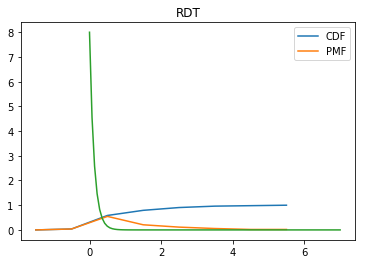

In [28]:
# data 
import thinkbayes as tb
import numpy as np
import matplotlib.pyplot as plt

import scipy

def plot_dist(dist, c=None):
    x, y = zip(*sorted(dist.Items()))
    plt.plot(x, y, c=c)

n = 53.0
freqs = [0, 2, 31, 42, 48, 51, 52, 53]
ps = [freq/n for freq in freqs]
xs = np.arange(-1.5, 6.5, 1.0)

cdf = tb.Cdf(xs, ps)
pmf = cdf.MakePmf()

plot_dist(cdf)
plot_dist(pmf)

plt.legend(["CDF", "PMF"])
plt.title("RDT")
#plt.show()


fit_data = list(pmf.GetDict().values())
loc, scale = scipy.stats.expon.fit(fit_data)

xs = np.linspace(0, 7, 100)
ys = [scipy.stats.expon.pdf(x, loc=loc, scale=scale) for x in xs]

plt.plot(xs, ys)


上圖是 53 名病患 RDT 的 CDF 和 PMF 圖

## TODO
The squares are the data points from the paper; the line is a model I fit to
the data. 

正尾很好的擬和（fit）冪次分佈，所以做這用了兩個冪次分佈的混合體。